# Anomaly is in the eye of the beholder (c)

In [1]:
%matplotlib inline
from itertools import count

import matplotlib.patches as mpatches
import matplotlib.path as mpath
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
import matplotlib.pyplot as plt
from PIL import Image
import io

import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.ensemble._iforest import _average_path_length

import IPython.display

In [2]:
n_inliers = 1 << 16
n_outliers = 1 << 4
rng = np.random.default_rng(0)


def generate_inliers(n, rng):
    return rng.uniform([0, 0], [0.5, 0.5], (n, 2))


def generate_outliers(n, rng, loc=[1, 1]):
    return rng.normal(loc, 0.1, (n, 2))


x = np.concatenate([generate_inliers(n_inliers, rng),
                    generate_outliers(n_outliers, rng, [1, 1]),
                    generate_outliers(n_outliers, rng, [0, 1]),
                    generate_outliers(n_outliers, rng, [1, 0])])
x_labels = np.concatenate([np.ones(n_inliers + n_outliers), -np.ones(2 * n_outliers)])

COLORS = {-1: 'red', 1: 'blue'}

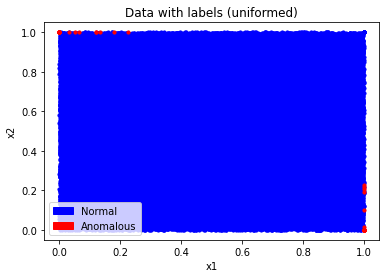

In [3]:
def uniform(x):
    index = np.argsort(x)
    revindex = np.argsort(index)
    return np.linspace(0, 1, len(x))[revindex]


x_uni = np.empty_like(x)
x_uni[:, 0] = uniform(x[:, 0])
x_uni[:, 1] = uniform(x[:, 1])

plt.figure()
plt.title('Data with labels (uniformed)')
plt.xlabel('x1')
plt.ylabel('x2')

plt.scatter(*x_uni[x_labels == 1].T, color='blue', s=10)
plt.scatter(*x_uni[x_labels == -1].T, color='red', s=10)

normal_patch = mpatches.Patch(color='blue', label='Normal')
anomalous_patch = mpatches.Patch(color='red', label='Anomalous')
plt.legend(handles=[normal_patch, anomalous_patch], loc='lower left')

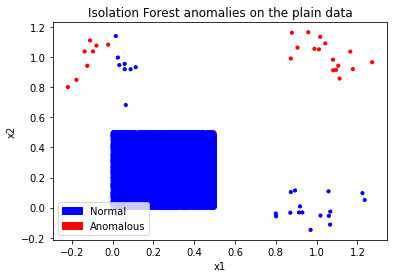

In [4]:
ifo = IsolationForest(n_estimators=200, random_state=0, contamination=2 * n_outliers / x.shape[0])
ifo.fit(x)

plt.figure()
plt.title('Isolation Forest anomalies on the plain data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(*x.T, c=[COLORS[l] for l in ifo.predict(x)], s=10)
blue_patch = mpatches.Patch(color='blue', label='Normal')
red_patch = mpatches.Patch(color='red', label='Anomalous')
plt.legend(handles=[blue_patch, red_patch], loc='lower left')

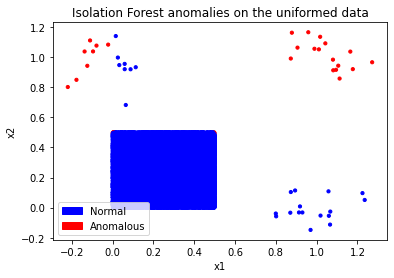

In [5]:
ifo = IsolationForest(n_estimators=200, random_state=0, contamination=2 * n_outliers / x.shape[0])
ifo.fit(x_uni)

plt.figure()
plt.title('Isolation Forest anomalies on the uniformed data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(*x.T, c=[COLORS[l] for l in ifo.predict(x_uni)], s=10)
blue_patch = mpatches.Patch(color='blue', label='Normal')
red_patch = mpatches.Patch(color='red', label='Anomalous')
plt.legend(handles=[blue_patch, red_patch], loc='lower left')